<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/ML_Final_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Import the data set
data = pd.read_csv("Project DataSet.csv")

In [12]:
print(data.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [13]:
column_to_modify1 = 'BMI'

# Change BMI: 1 = Obseity, 0 = Not Obese
data[column_to_modify1] = data[column_to_modify1].apply(lambda x: 1 if x >= 30 else 0)

column_to_modify2 = 'Diabetes'

# Change Diabetes: 1 = Type 1 or Type 2, 0 = Not Diabetic
data[column_to_modify2] = data[column_to_modify2].apply(lambda x: 1 if x >= 1 else 0)


In [14]:
# Seperating data
y = data.values[:, 0]        # Heart Disease or Attack
x = data.values[:, 1:19]

# Seperating training and validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


# Scale Data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)



# Logistic Regression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [15]:
# Predicting Output
y_pred = classifier1.predict(x_test)
y_pred[0:5]


from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)




In [16]:
# Evaluation of model
from sklearn import metrics
print("Accuracy (Health Factors):",metrics.accuracy_score(y_test, y_pred))
print("Precision (Health Factors):",metrics.precision_score(y_test, y_pred))
print("Recall (Health Factors):",metrics.recall_score(y_test, y_pred))
print("F1 score (Health Factors):",metrics.f1_score(y_test, y_pred),'\n')


Accuracy (Health Factors): 0.9089206874802901
Precision (Health Factors): 0.5763397371081901
Recall (Health Factors): 0.11944677284157586
F1 score (Health Factors): 0.19788231209859397 



Text(0.5, 427.9555555555555, 'Predicted label')

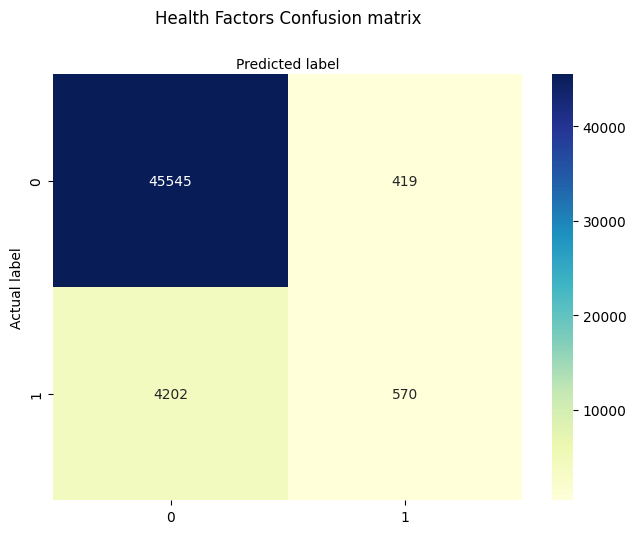

In [17]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Health Factors Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



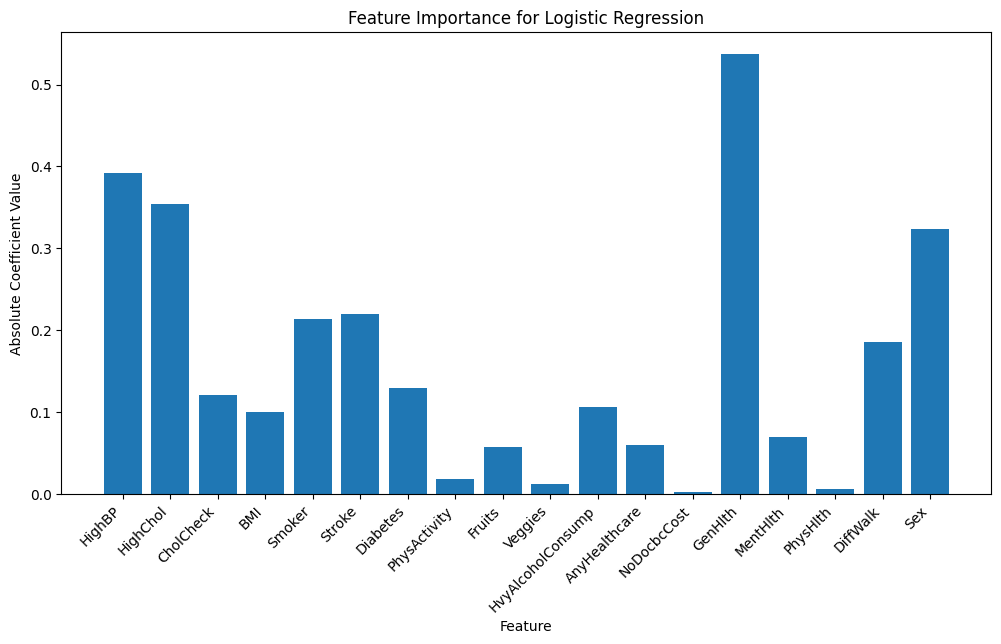

In [18]:
# Feature Importance
feature_importance = np.abs(classifier1.coef_[0])

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), data.columns[1:19], rotation=45, ha="right")  # Assuming features start from the second column
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.show()